In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from rasterio.mask import mask
from rasterio.plot import show
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import textwrap

import Plot_Tricks as pt
import Maps as Maps
import ResultsPlots as RS
from shapely.geometry import box 
import matplotlib.image as mpimg

import importlib
importlib.reload(RS)
importlib.reload(pt)
importlib.reload(Maps)
% matplotlib inline


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

HeaderFont = 60
HeadSpace = 25
HeadPad = HeadSpace + 10
TextFont = 34
SubTextfont = 30

Major_Label_Font = 30
Minor_Label_Font = 20


HeaderPad = 35
pane_y_pad = 20

Background_Color = (.9,.9,.9)
dpi = 300

UBC_Blue = '#002145'#(.1,.3,.6)

xoff = 5



def mm_in(Size):
    Size=(Size[0]*0.0393701,Size[1]*0.0393701)
    return(Size)

def Section(w,h):
    Size = mm_in((w,h))
    fig,ax = plt.subplots(1,1,figsize=Size)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
    x = np.arange(0, w, w/10)
    y = np.arange(0, h, h/10)
    ax.set_facecolor(Background_Color)
    ax.set_xlim(0,w)
    ax.set_ylim(0,h)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return(fig,ax)

def rec_pos(w1,h1,x1,y1,w2,h2):
    rect = [x1/w1,y1/h1,w2/w1,h2/h1]
    return(rect)

def Header(ax,h,w,Header):
    ax.add_patch(Rectangle((0,h-HeadSpace),w,HeadSpace,
                           facecolor = UBC_Blue,edgecolor='black',figure=fig))
    ax.text(xoff,h-HeadSpace+5,Header,fontsize = HeaderFont,color = 'white')
    
class TextWrap:
    def __init__(self):
        self.Replace={'CO2':'CO$_2$','CH4':'CH$_4$','13th':'13$^{th}$','23rd':'23$^{rd}$','km2':'km$^2$',
                     'm-2':'m$^{-2}$','d-1':'d$^{-1}$','Ta':'T$_a$','Tp':'T$_p$','zm':'z$_m$','Wt':'W$_T$'}
    def Wrap(self,Text,Width):
        Text = textwrap.fill(Text,Width)
        for rep in self.Replace:
            Text = Text.replace(rep,self.Replace[rep])
        return(Text)
TW = TextWrap()
   
Pic1 = "C:\\FishIsland_2017\\Pictures\\Drone\\7_12\\Oblique/DJI_0323.jpg"
Pic2 = "C:\\FishIsland_2017\\Pictures\\Drone\\9_13\\Oblique/DJI_0592.jpg"
Pic3 = "C:\\FishIsland_2017\\Pictures\\Personal/P6220056.jpg"

def Im1(ax):
    img=mpimg.imread(Pic1)
    imgplot = ax.imshow(img)
    ax.set_xlim(1000,5000)
    ax.set_ylim(3000,500)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

def Im2(ax):
    img=mpimg.imread(Pic2)
    imgplot = ax.imshow(img)
#     ax.set_xlim(1000,5000)
#     ax.set_ylim(3000,500)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
def Im3(ax):
    img=mpimg.imread(Pic3)
    imgplot = ax.imshow(img)
#     ax.set_xlim(1000,5000)
#     ax.set_ylim(3000,500)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Abstract

(0.9, 0.9, 0.9)


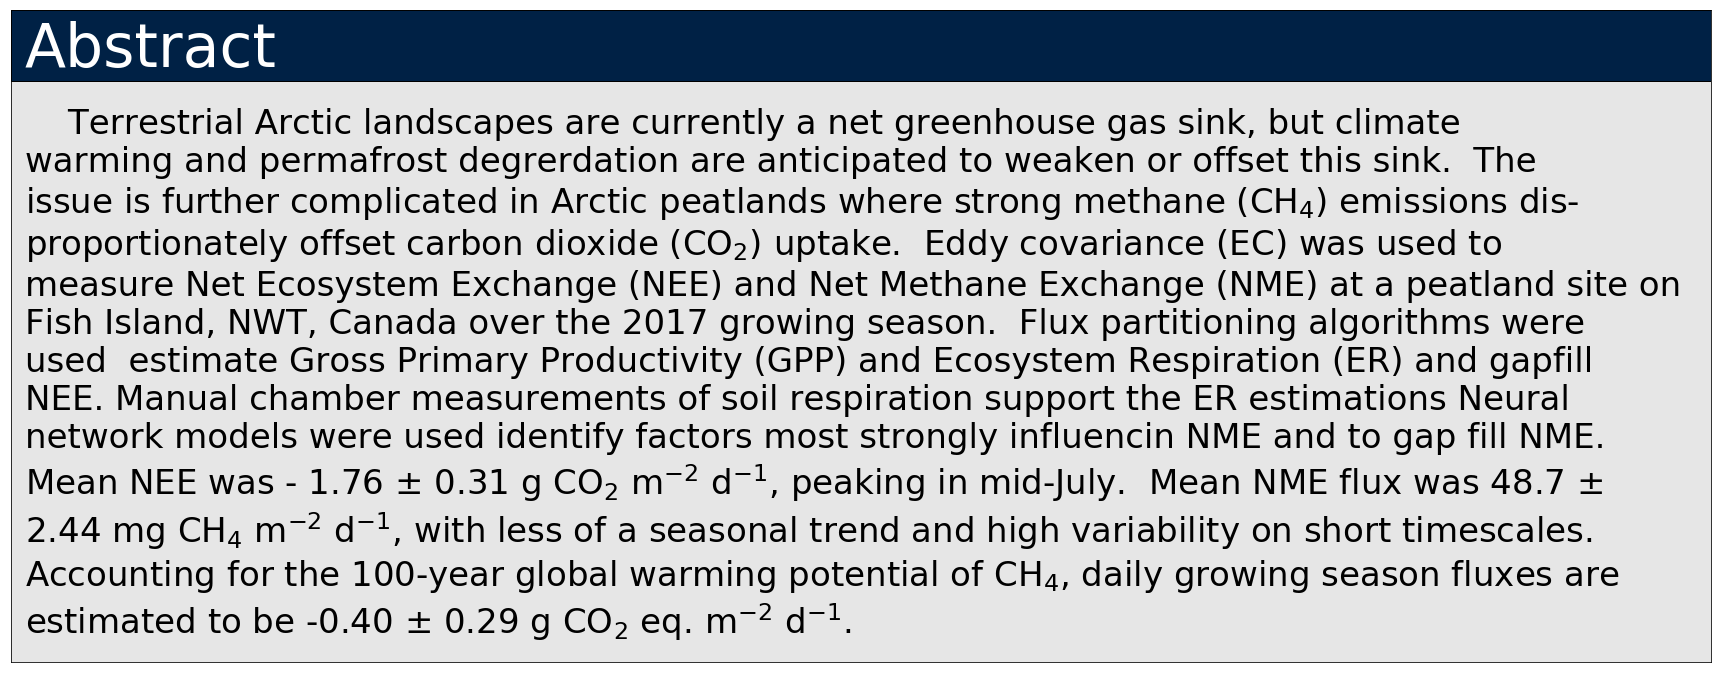

In [56]:
Par1 = r"    Terrestrial Arctic landscapes are currently a net greenhouse gas sink, "+\
"but climate warming and permafrost degrerdation are anticipated to weaken or offset this sink."+\
"  The issue is further complicated in Arctic peatlands where strong methane (CH4) emissions "+\
"dis-proportionately offset carbon dioxide (CO2) uptake.  Eddy covariance (EC) was used to measure"+\
" Net Ecosystem Exchange (NEE) and Net Methane Exchange (NME) at a peatland site on "+\
"Fish Island, NWT, Canada over the 2017 growing season.  Flux partitioning algorithms were used "+\
" estimate Gross Primary Productivity (GPP) and Ecosystem Respiration (ER) and gapfill NEE."+\
" Manual chamber measurements of soil respiration support the ER estimations"+\
" Neural network models were used identify factors most strongly influencin NME and to "+\
"gap fill NME.  Mean NEE was"+\
" - 1.76 ± 0.31 g CO2 m-2 d-1, peaking in mid-July."+\
"  Mean NME flux was 48.7 ± 2.44 mg CH4 m-2 d-1, with less of a"+\
" seasonal trend and high variability on short timescales.  Accounting for the 100-year global warming"+\
" potential of CH4, daily growing season fluxes are estimated to be -0.40 ± 0.29 g CO2 eq. m-2 d-1."

Abstract_W = 600
Abstract_H = 230

fig,ax=Section(Abstract_W,Abstract_H)
Header(ax,Abstract_H,Abstract_W,Header = 'Abstract')
ax.text(5,Abstract_H-HeadPad,TW.Wrap(Par1,92),fontsize = TextFont,verticalalignment='top')
plt.savefig("C:/FishIsland_2017/EGU/Abstract.png",dpi = dpi)

# Site and Data

0.941527111168
2730428.62239 2900000.0


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


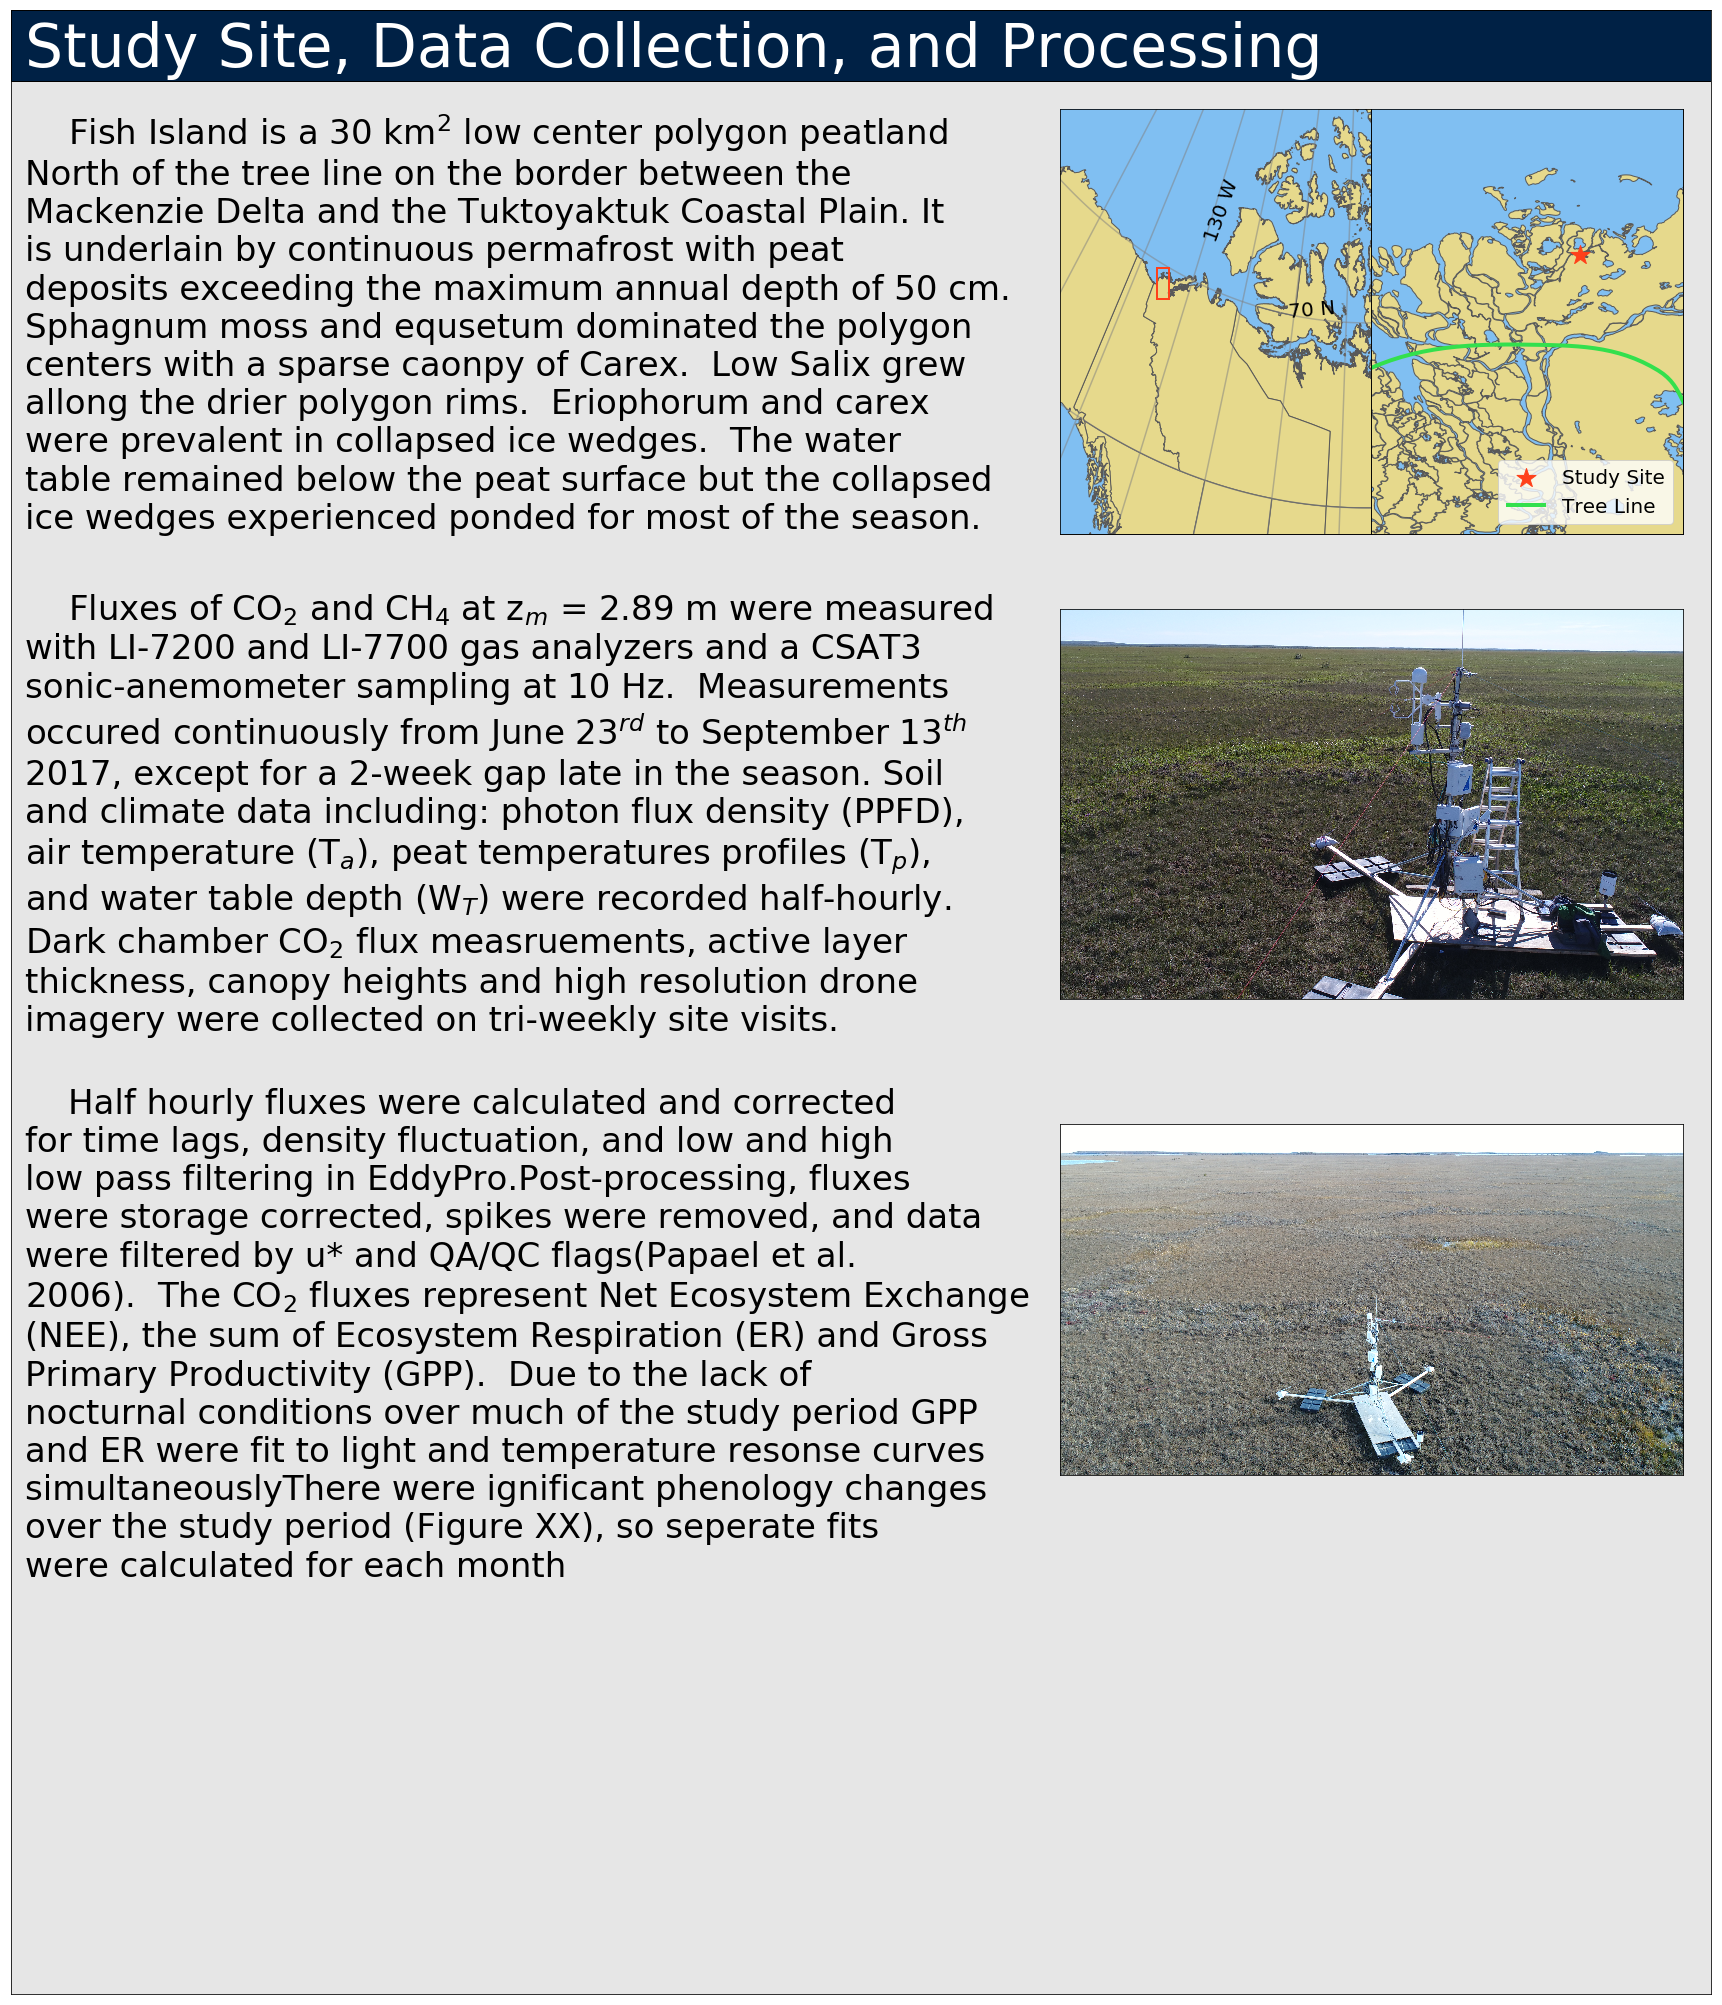

In [68]:
Par1 = "    Fish Island is a 30 km2 low center polygon peatland North of the tree line on the border"+\
" between the Mackenzie Delta and the Tuktoyaktuk Coastal Plain. It"+\
" is underlain by continuous permafrost with peat deposits exceeding the maximum annual"+\
" depth of 50 cm. Sphagnum moss and equsetum dominated the polygon centers with a sparse caonpy of"+\
" Carex.  Low Salix grew allong the drier polygon rims.  Eriophorum and carex were prevalent"+\
" in collapsed ice wedges.  The water table remained below the peat surface"+\
" but the collapsed ice wedges experienced ponded for most of the season."

Par2 = "    Fluxes of CO2 and CH4 at zm = 2.89 m were measured with LI-7200 and LI-7700 gas analyzers"+\
" and a CSAT3 sonic-anemometer sampling at 10 Hz.  Measurements occured continuously from June 23rd to September "+\
"13th 2017, except for a 2-week gap late in the season."+\
" Soil and climate data including: photon flux density (PPFD), air temperature (Ta), "+\
"peat temperatures profiles (Tp), and water table depth (Wt) were recorded half-hourly."+\
"  Dark chamber CO2 flux measruements, active layer thickness, canopy heights and high resolution"+\
" drone imagery were collected on tri-weekly site visits."

Par3 = "    Half hourly fluxes were calculated and corrected for time lags"+\
", density fluctuation, and low and high low pass filtering in EddyPro."+\
"Post-processing, fluxes were storage corrected, spikes were removed, and data were filtered by u* and "+\
"QA/QC flags(Papael et al. 2006).  The CO2 fluxes represent "+\
"Net Ecosystem Exchange (NEE), the sum of Ecosystem Respiration (ER) and Gross Primary Productivity (GPP)."+\
"  Due to the lack of nocturnal conditions over much of the study period GPP and ER were fit "+\
"to light and temperature resonse curves simultaneously"+\
"There were ignificant phenology changes over the study period (Figure XX), so seperate fits were calculated for each month"



importlib.reload(Maps)
Site_W = 600
Site_H = 700
Text_W = 55

fig,ax = Section(Site_W,Site_H)
Header(ax,Site_H,Site_W,Header = 'Study Site, Data Collection, and Processing')
ax.text(xoff,Site_H-HeadPad,TW.Wrap(Par1,Text_W),fontsize = TextFont,verticalalignment='top')

Map_H = 150
Map_W = 220
Map_X = 370
Map_Y = Site_H-HeadPad-Map_H
rect = rec_pos(Site_W,Site_H,Map_X,Map_Y,Map_W,Map_H)
ax1 = pt.add_subplot_axes(ax,rect)
Maps.Intro_Map(ax1,Major_Label_Font,Minor_Label_Font,clipped=True)

Row2 = 495
Pic_H = Map_H
Pic_W = Map_W
Pic_X = Map_X
Pic_Y = Row2-Pic_H
rect = rec_pos(Site_W,Site_H,Pic_X,Pic_Y,Pic_W,Pic_H)
ax2 = pt.add_subplot_axes(ax,rect)
Im1(ax2)
ax.text(xoff,Row2,TW.Wrap(Par2,Text_W),fontsize = TextFont,verticalalignment='top')

Row3 = 320
Pic_H = Map_H
Pic_W = Map_W
Pic_X = Map_X
Pic_Y = Row3-Pic_H
rect = rec_pos(Site_W,Site_H,Pic_X,Pic_Y,Pic_W,Pic_H)
ax3 = pt.add_subplot_axes(ax,rect)
Im2(ax3)
ax.text(xoff,Row3,TW.Wrap(Par3,Text_W),fontsize = TextFont,verticalalignment='top')

# Row4 = 100

# NEE = r"NEE = GPP + ER"
# ER = r"$ER = R_{10}Q_{10}^{\frac{T_a-10}{10}}$"
# GPP = r"$GPP = {\frac{1}{2\theta}}(\alpha PPFD +\beta -\sqrt{(\alpha PPFD +\beta)^2-4\alpha\beta\theta PPFD))}$"

# Gap_L1 =  "* Gaps in the NEE were filled by calculating Ecosystem Respiration"+\
# " and Gross Primary Productivity (GPP) where:\n"

# Gap_L2 = "* Typically, Ecosystem Respiration (ER) is calculated first by fitting night-time NEE to an "+\
# "air temperature response curve:"

# Gap_L3 = "* This relationship is then extrapolated to the daytime and GPP is calculated from [1],"+\
# " GPP is then fit to a light response curve:"

# Gap_L4 = "* However, the lack of nocturnal conditions over much of the study period makes this method "+\
# "impractical.  Instead, [2] and [32], were subsituted into [1] and the equations were fit together simultaneously."+\
# "Due to the significant phenology changes over the study period (Figure XX), seperate fits were calculated for each month"


# Y1 = Gap_H-Row4
# ax.text(xoff,Y1,TW.Wrap(Gap_L1,Text_W),fontsize = TextFont,verticalalignment='top')
# ax.text(Gap_W/2,Y1-Eq_Space,NEE,fontsize = TextFont,horizontalalignment='center',verticalalignment='top')
# # ax.text(Gap_W,Y1-Eq_Space,'[1]',fontsize = TextFont,horizontalalignment='right',verticalalignment='top')

# Y2 = Y1-Eq_Space-Pad
# ax.text(xoff,Y2,TW.Wrap(Gap_L2,Text_W),fontsize = TextFont,verticalalignment='top')
# ax.text(Gap_W/2,Y2-Eq_Space,ER,fontsize = TextFont,horizontalalignment='center',verticalalignment='top')
# # ax.text(Gap_W,Y2-Eq_Space,'[2]',fontsize = TextFont,horizontalalignment='right',verticalalignment='top')

# Y3 = Y2-Eq_Space-Pad
# ax.text(xoff,Y3,TW.Wrap(Gap_L3,Text_W),fontsize = TextFont,verticalalignment='top')
# ax.text(Gap_W/2,Y3-Eq_Space,GPP,fontsize = TextFont,horizontalalignment='center',verticalalignment='top')
# # ax.text(Gap_W,Y3-Eq_Space,'[3]',fontsize = TextFont,horizontalalignment='right',verticalalignment='top')


plt.savefig("C:/FishIsland_2017/EGU/SiteandData.png",dpi = dpi)
# pt.

# Gap Filling

(0.9, 0.9, 0.9)


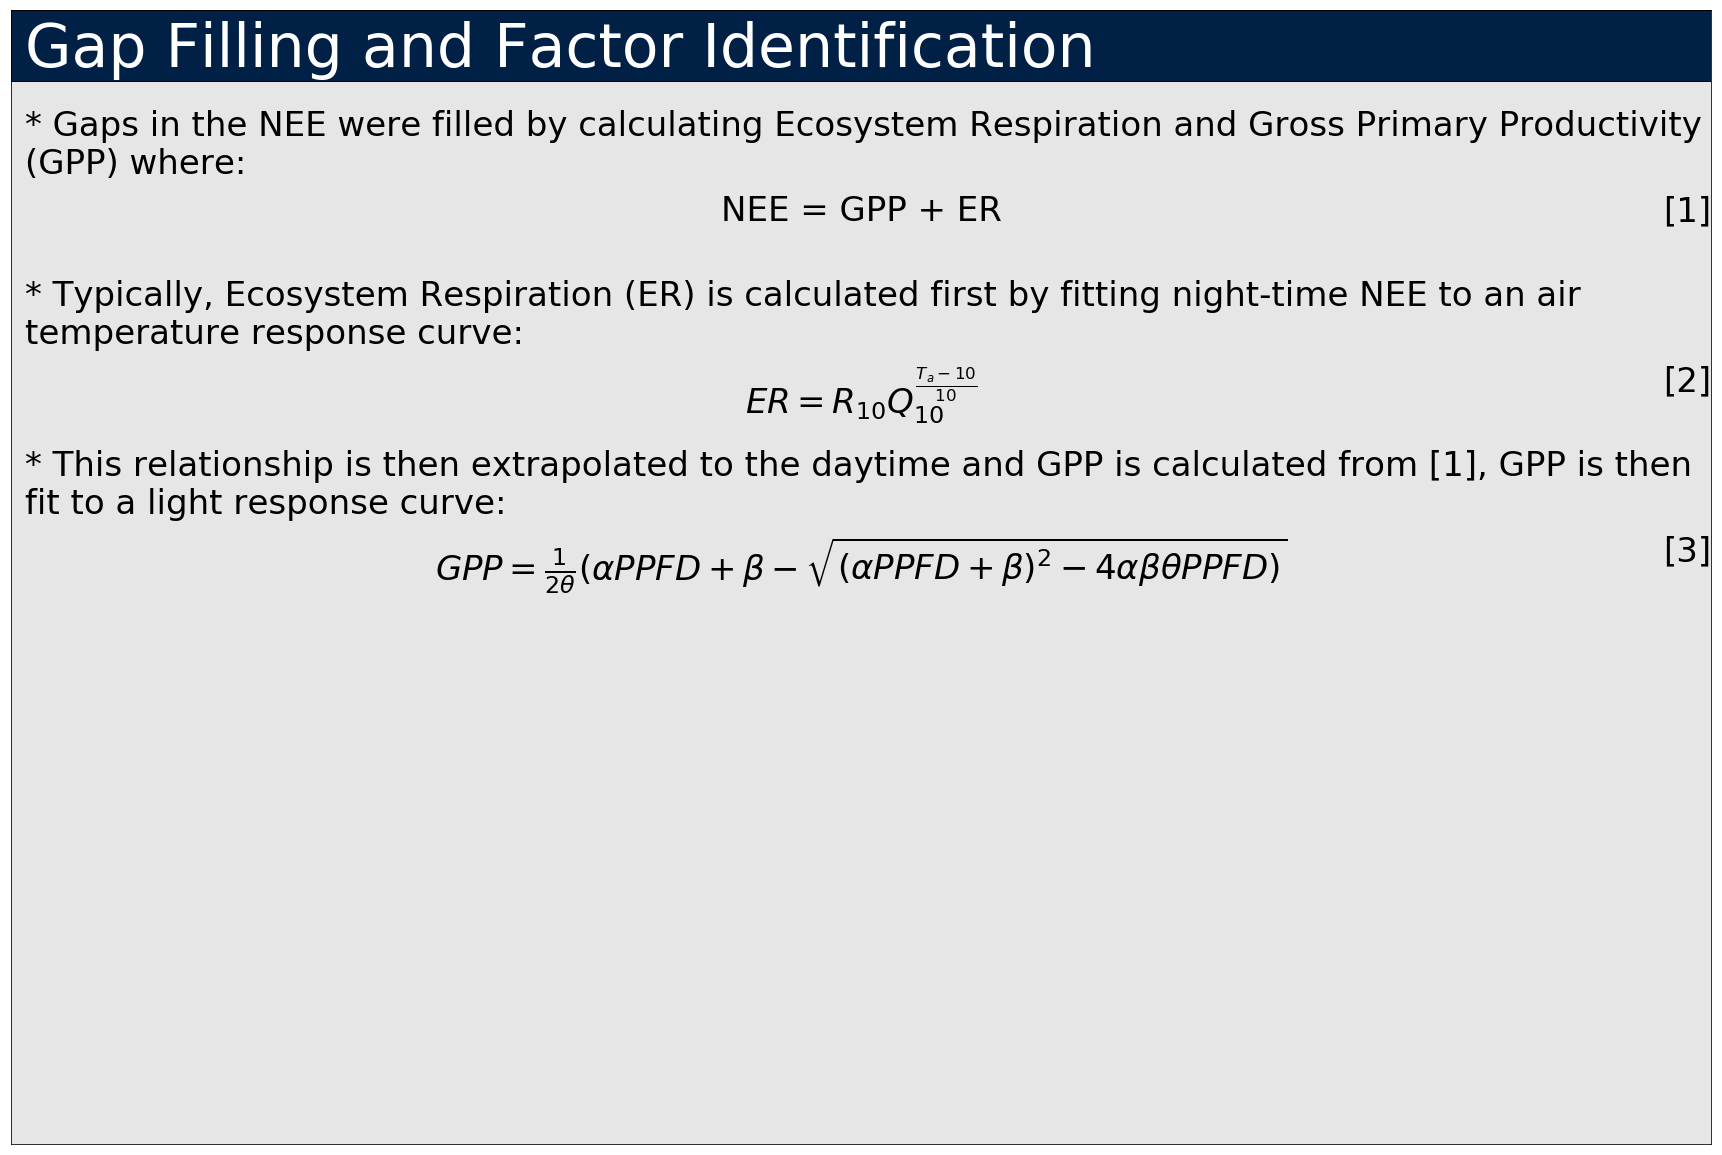

In [53]:

importlib.reload(Maps)

Gap_W = 600
Gap_H = 400
Text_W = 100
Eq_Space = 30
Pad = 30
fig,ax = Section(Gap_W,Gap_H)

Header(ax,Gap_H,Gap_W,Header = 'Gap Filling and Factor Identification')

# rect = rec_pos(Gap_W,Gap_H,2.5,2.5,595,220)
# ax1 = pt.add_subplot_axes(ax,rect)

# x1 = 504665.0
# y1 = 7695865.0
# x2 = x1+50
# y2 = y1+50
# bounds = [x1,y1,x2,y2]

# xs,ys = 0.25,1
# x1,y1 = 0.0,0.0
# x2,y2 = 0.25,0.0
# x3,y3 = 0.5,0.0
# x4,y4 = 0.75,0.0
# pos=xs,ys,x1,y1,x2,y2,x3,y3,x4,y4

# # PC = Maps.Phenology_Change(ax1,Major_Label_Font,Minor_Label_Font,bounds,pos)

# Units = 10
# Posx = 32
# Posy = 5
# Posx2 = 37
# Posy2 = 10
# size = 12

# # PC.Scale(PC.ax1,Units,Posx,Posy,Posx2,Posy2,size)

# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)

plt.savefig("C:/FishIsland_2017/EGU/GapFilling.png",dpi = dpi)

In [ ]:
importlib.reload(im)

w,h=600,350
Size = mm_in((w,h))

fig,ax = Section(w,h)

# Phenology_Change()
# plt.axis('off')
# plt.gca().set_position([0, 0, 1, 1])
Header(ax,h,Header = 'Processing and Gap Filling')
# ax.text(xoff,h-HeadSpace,r'Data Collection and Processing',fontsize = HeaderFont)
ax.text(xoff,h-110,Gap_L1,fontsize = First_Level)
ax.text(xoff,h-220,Gap_L2,fontsize = First_Level)
ax.text(xoff,h-300,Gap_L3,fontsize = First_Level)
# ax.text(xoff,h-180,Gap_L4,fontsize = First_Level)

rect = rec_pos(w,h,400,200,195,195)
ax1 = pt.add_subplot_axes(ax,rect)


rect = rec_pos(w,h,350,xoff,200,145)
ax2 = pt.add_subplot_axes(ax,rect)

# im.Intro_Map(ax1,Major_Label_Font,Minor_Label_Font)
# Im1(ax2)

# pt.

# Results

In [ ]:
Res_L1 = "- Fish Island is a net carbon sink over the growing season."

Res_L2 = "- CH4 emissions are high relative to similar landscapes (Sachs et al. 2008)"
Res_L3 = "- On an annual the site is probably a source GHGs"


In [ ]:
w,h=600,500

importlib.reload(RS)
Path = 'C:/FishIsland_2017/FilteredData2018-04-03.csv'
results = RS.Results(Path,Major_Label_Font,Minor_Label_Font)

fig,ax = Section(w,h)

rect = rec_pos(w,h,400,300,145,145)
ax1 = pt.add_subplot_axes(ax,rect)
results.Light_Response(ax1)


rect = rec_pos(w,h,200,100,200,200)
ax2 = pt.add_subplot_axes(ax,rect)
results.C_Balance(ax2)
# print(results.)
Header(ax,h,Header = 'Results')

# ax.text(0,h-20,r'Results',fontsize = HeaderFont)
ax.text(0,h-60,Res_L1,fontsize = First_Level)
ax.text(0,h-100,Res_L2,fontsize = First_Level)
ax.text(0,h-140,Res_L3,fontsize = First_Level)
# plt.text(0,h,r'$\frac{3}{4} \binom{3}{4} \stackrel{3}{4}$',fontsize = 40)
ax.grid()
plt.savefig("C:/FishIsland_2017/EGU/Results.png",dpi = dpi)

In [ ]:
w,h=600,500

importlib.reload(RS)
Path = 'C:/FishIsland_2017/FilteredData2018-04-03.csv'
results = RS.Results(Path,Major_Label_Font,Minor_Label_Font)

fig,ax = Section(w,h)

rect = rec_pos(w,h,400,300,145,145)
ax1 = pt.add_subplot_axes(ax,rect)
results.Light_Response(ax1)


rect = rec_pos(w,h,200,100,200,200)
ax2 = pt.add_subplot_axes(ax,rect)
results.C_Balance(ax2)
# print(results.)
Header(ax,h,Header = 'Results cont.')

# ax.text(0,h-20,r'Results',fontsize = HeaderFont)
ax.text(0,h-60,Res_L1,fontsize = First_Level)
ax.text(0,h-100,Res_L2,fontsize = First_Level)
ax.text(0,h-140,Res_L3,fontsize = First_Level)
# plt.text(0,h,r'$\frac{3}{4} \binom{3}{4} \stackrel{3}{4}$',fontsize = 40)
ax.grid()
plt.savefig("C:/FishIsland_2017/EGU/Results2.png",dpi = dpi)

# Conclusions

In [ ]:
Concl_L1 = "- Fish Island is a net carbon sink over the growing season."
Concl_L2 = "- CH4 emissions are high relative to similar landscapes (Sachs et al. 2008)"
Concl_L3 = "- On an annual the site is probably a source GHGs"

In [ ]:
w,h=600,300

fig,ax = Section(w,h)

Header(ax,h,Header = 'Conclusions')
# ax.text(0,h-20,r'Conclusions',fontsize = HeaderFont)
ax.text(0,h-60,Concl_L1,fontsize = First_Level)
ax.text(0,h-100,Concl_L2,fontsize = First_Level)
ax.text(0,h-140,Concl_L3,fontsize = First_Level)
# plt.text(0,h,r'$\frac{3}{4} \binom{3}{4} \stackrel{3}{4}$',fontsize = 40)
ax.grid()

plt.savefig("C:/FishIsland_2017/EGU/Conclusions.png",dpi=dpi)

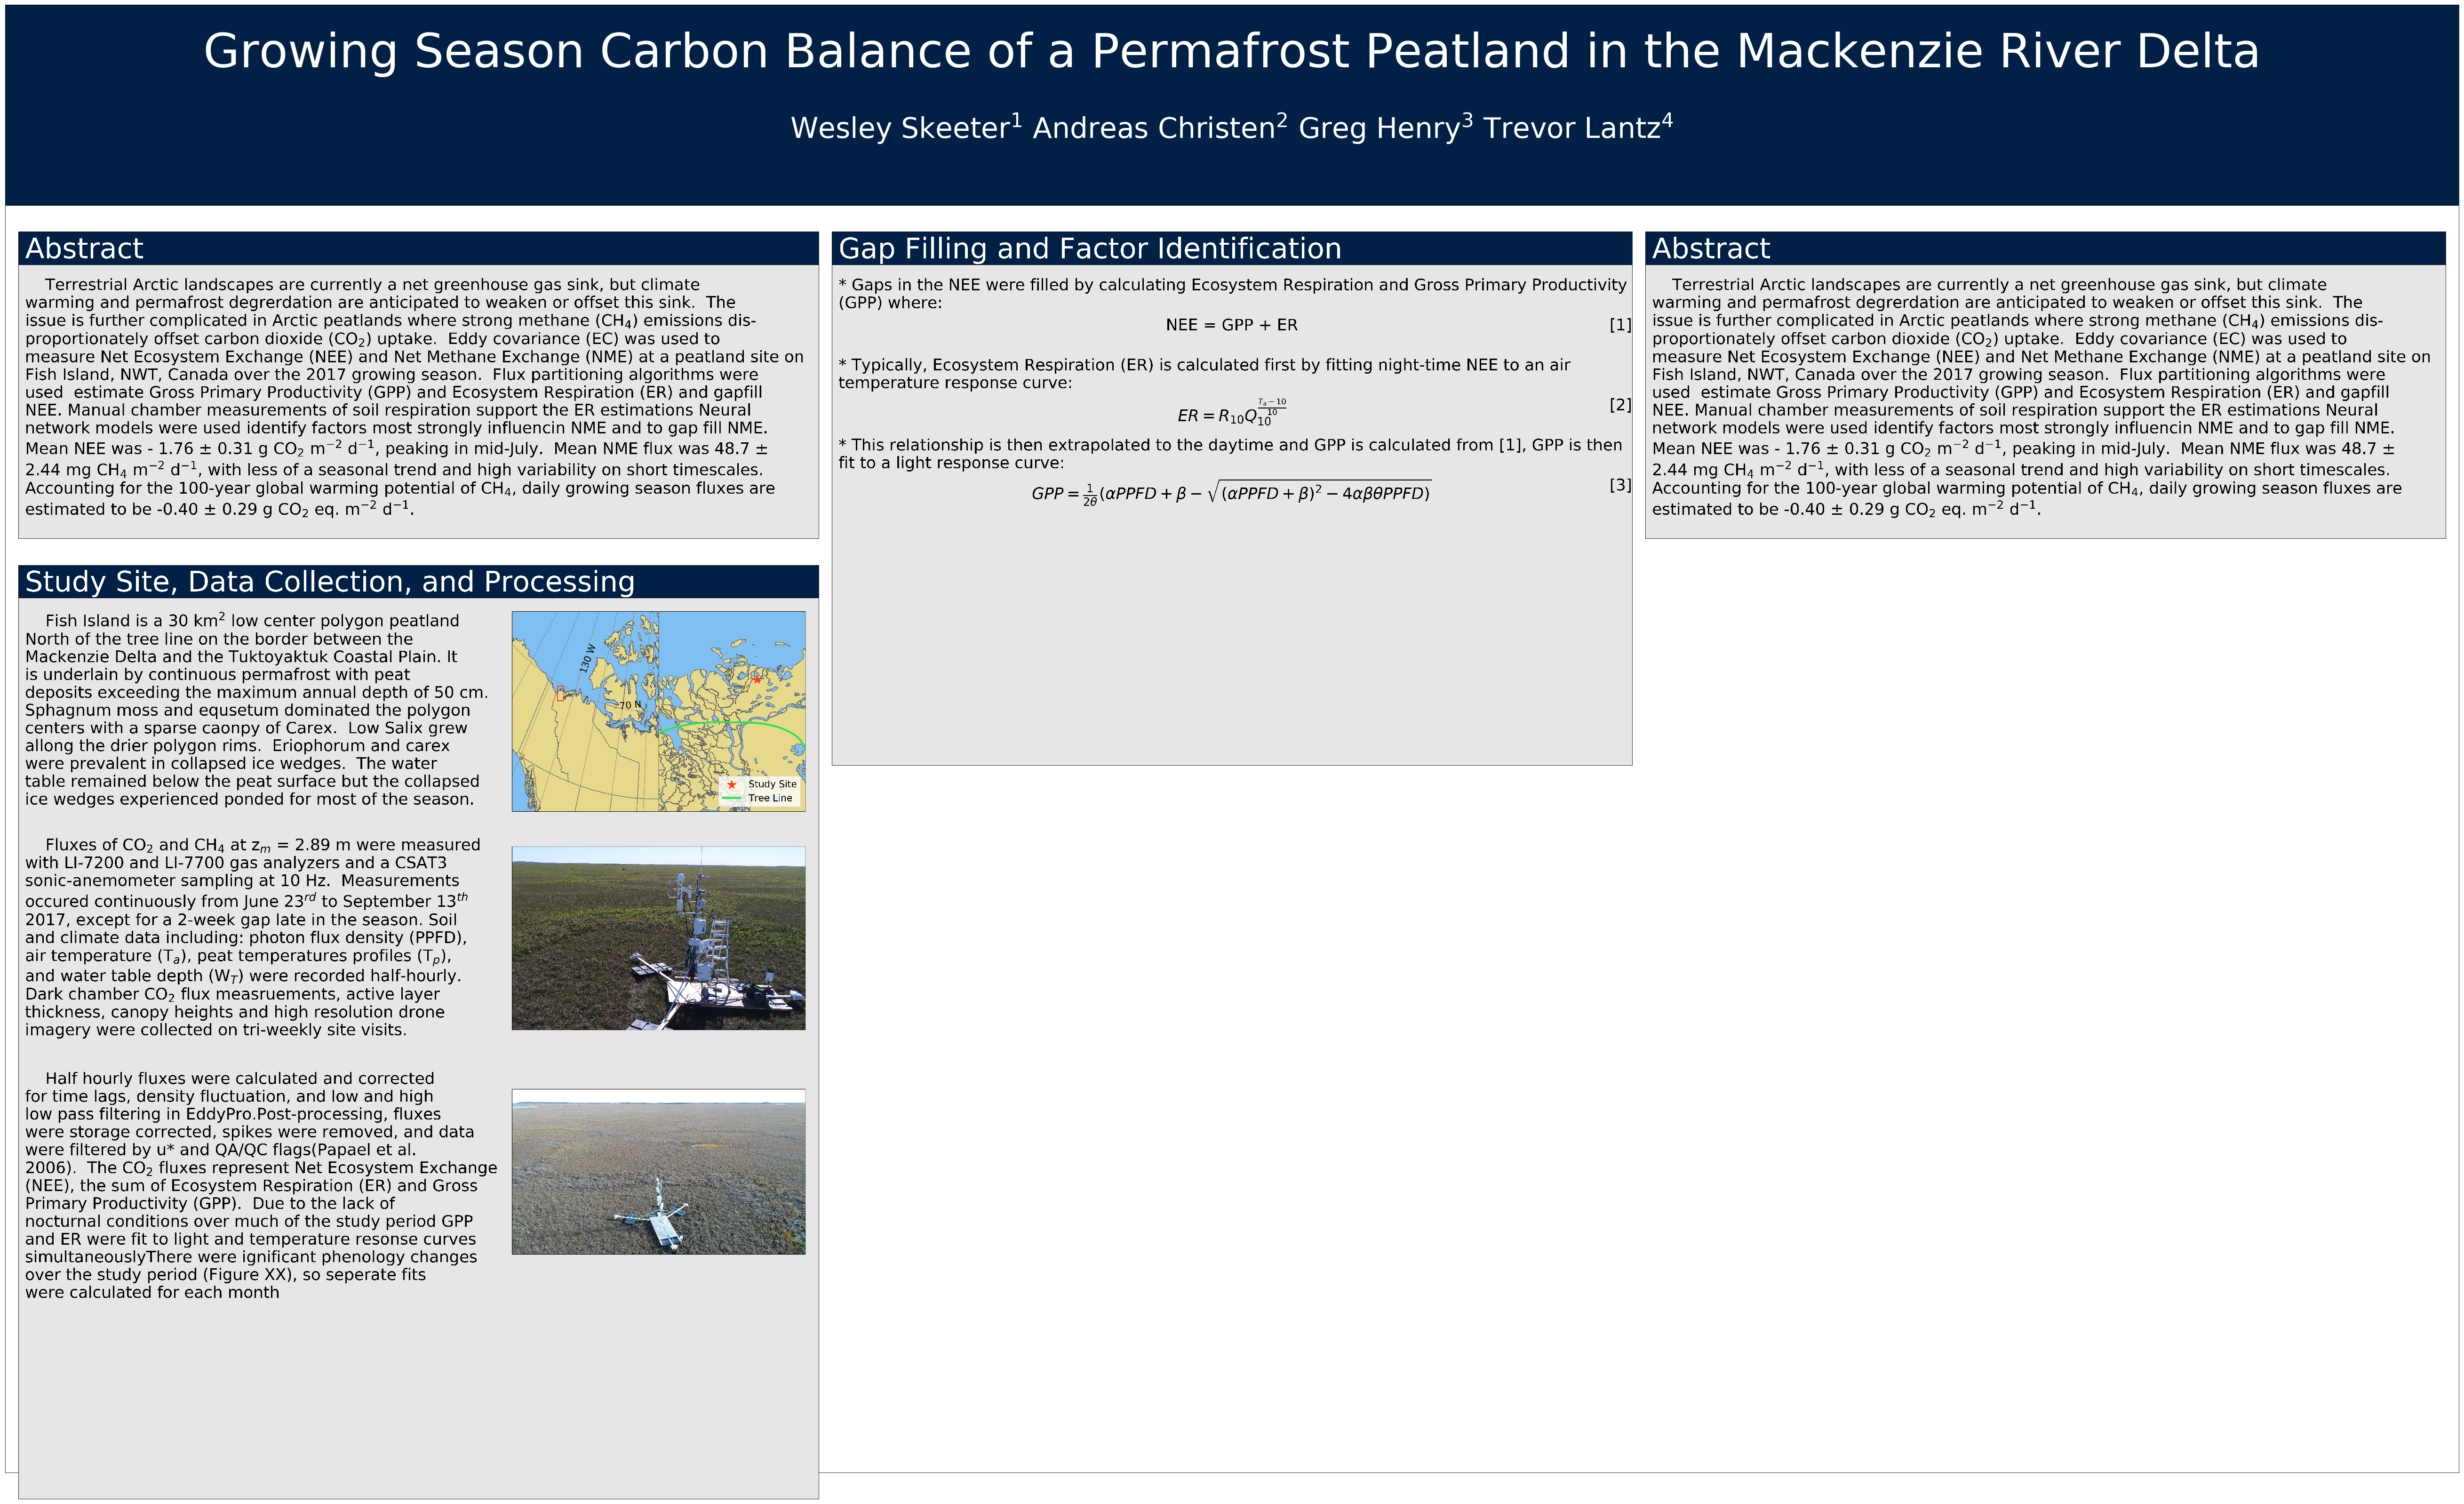

In [69]:
w,h = 1840,1100

TitleFont = 100
TitleSpace = 150
TitlePad = 20
# fig,ax=Section(w,h)

Size = mm_in((w,h))
fig,ax = plt.subplots(1,1,figsize=Size)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
x = np.arange(0, w, w/10)
y = np.arange(0, h, h/10)
ax.set_facecolor('white')
ax.set_xlim(0,w)
ax.set_ylim(0,h)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.add_patch(Rectangle((0,h-TitleSpace),w,TitleSpace,
                       facecolor = UBC_Blue,edgecolor='black',figure=fig))
ax.text(w/2,h-20,
        'Growing Season Carbon Balance of a Permafrost Peatland in the Mackenzie River Delta',
        verticalalignment='top',horizontalalignment='center',fontsize = TitleFont,color = 'white')

ax.text(w/2,h-80,
        'Wesley Skeeter$^1$ Andreas Christen$^2$ Greg Henry$^3$ Trevor Lantz$^4$',
        verticalalignment='top',horizontalalignment='center',fontsize = HeaderFont,color = 'white')


def MakePane(ax,file):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    img=mpimg.imread(file)
    imgplot = ax.imshow(img)
    
PaneTops = h-(TitleSpace+TitlePad)
leftX = 10
midX = 620
rightX = 1230

# Abstract
Abstract_Y = PaneTops-Abstract_H
Abstract_X = leftX

rect = rec_pos(w,h,Abstract_X,Abstract_Y,Abstract_W,Abstract_H)
ax1 = pt.add_subplot_axes(ax,rect)
MakePane(ax1,"C:/FishIsland_2017/EGU/Abstract.png")

# Site & Data
Site_Y = Abstract_Y - pane_y_pad - Site_H
Site_X = leftX
rect = rec_pos(w,h,leftX,Site_Y,Site_W,Site_H)
ax2 = pt.add_subplot_axes(ax,rect)


Gap_Y = PaneTops-Gap_H

rect = rec_pos(w,h,midX,Gap_Y,Gap_W,Gap_H)
ax1 = pt.add_subplot_axes(ax,rect)
MakePane(ax1,"C:/FishIsland_2017/EGU/GapFilling.png")


rect = rec_pos(w,h,rightX,Abstract_Y,Abstract_W,Abstract_H)
ax1 = pt.add_subplot_axes(ax,rect)
MakePane(ax1,"C:/FishIsland_2017/EGU/Abstract.png")

MakePane(ax2,"C:/FishIsland_2017/EGU/SiteandData.png")

# plt.savefig("C:/FishIsland_2017/EGU/Poster.png",dpi = dpi)